In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:

import pandas as pd
import numpy as np
from rank_bm25 import BM25Okapi
import nltk
import heapq
import tqdm
import matplotlib.pyplot as plt

def get_evaluation_set():
    data = pd.read_csv("../data scraping/extracted_data.csv")
    return data

df = get_evaluation_set()
df = df[df['model_size'] == '175b']

print(df.shape)
df


(41944, 5)


,book_text,depth_3_summary,model_size,book_num,document_index
41944,"THE BIRTH OF A WOMAN-CHILD\n\n""Whose cradle's ...","Uncle Pros is helping Laurella, his sick niece...",175b,0,0
41945,selfish--said she'd like to know how I was goi...,"Laurella explains that her husband, Consadine,...",175b,0,1
41946,"rich, broken light from the cavernous fireplac...",Pros takes the cradle outside to get the last ...,175b,0,2
41947,"\n""Well, you go ask Pap to look in the green c...",Mavity sends Bud and Mandy Ann to ask her fath...,175b,0,3
41948,"she wants--ain't ye, Pretty?""\n\nAnd, having m...",Pros finishes repairing the cradle and places ...,175b,0,4
...,...,...,...,...,...
83883,"\nAlong the Paris streets, the death-carts rum...","Along the streets of Paris, death carts rumble...",175b,266,320
83884,"and faces are often turned up to some of them,...",The faces of the people are often turned up to...,175b,266,321
83885,"Defarge!""\n\n""She never missed before,"" says a...","The Vengeance calls out for Therese, but she d...",175b,266,322
83886,"and differing, have come together on the dark ...",The seamstress tells Sydney that she has an on...,175b,266,323


In [68]:
filtered_df = df[:400]

Starting recall@k calculation for k=1 to 10...


Recall@k:  14%|█▎        | 54/400 [00:00<00:01, 266.78row/s]

[128, 2, 0, 3, 7, 41369, 41339, 41372, 41331, 41384]
[1, 41330, 41372, 41342, 41386, 41331, 41349, 41350, 41348, 41339]
[41389, 41330, 2, 41348, 41376, 41381, 41331, 41398, 41357, 41380]
[3, 41332, 41330, 41345, 41370, 41331, 41348, 41329, 41342, 41328]
[4, 41330, 41377, 17664, 41358, 41366, 41348, 41370, 41401, 41346]
[5, 41331, 943, 41344, 16938, 41338, 41335, 41330, 43, 17691]
[6, 41372, 41364, 41370, 41398, 41368, 41381, 41396, 17679, 229]
[7, 41339, 41371, 41331, 41346, 41380, 41384, 41370, 41338, 41373]
[8, 136, 122, 21, 78, 153, 119, 104, 120, 64]
[9, 132, 10, 119, 18, 104, 144, 21, 41330, 7]
[10, 95, 107, 16, 90, 18, 172, 158, 155, 30]
[12, 104, 41372, 41339, 41348, 107, 41380, 7, 41383, 41331]
[12, 104, 41380, 103, 41362, 41371, 41339, 41338, 41342, 41325]
[17709, 17706, 17, 41342, 17653, 17673, 41396, 41375, 41399, 41340]
[16, 14, 90, 10, 124, 210, 203, 41335, 107, 41345]
[16, 15, 187, 104, 210, 107, 95, 65, 41372, 124]
[16, 17690, 41332, 41400, 41353, 41348, 41334, 41376, 41

Recall@k:  27%|██▋       | 109/400 [00:00<00:01, 270.01row/s]

[68, 41355, 41329, 41342, 41369, 41350, 41351, 41381, 41380, 41354]
[41386, 41339, 41348, 41331, 41346, 104, 41371, 41376, 41351, 41396]
[41371, 41339, 41386, 41338, 41363, 41331, 41340, 41381, 41348, 41349]
[136, 65, 107, 46, 155, 125, 91, 85, 176, 56]
[136, 72, 56, 46, 65, 51, 158, 107, 41363, 39]
[73, 107, 158, 195, 65, 10, 16, 104, 144, 74]
[41330, 41350, 41381, 41396, 41385, 17664, 41390, 41389, 41338, 41340]
[41338, 41339, 41330, 41382, 41373, 41389, 17707, 41363, 41381, 41380]
[76, 136, 16, 82, 112, 107, 176, 41355, 33, 197]
[77, 81, 123, 80, 41348, 41351, 41342, 79, 41349, 26]
[78, 122, 110, 82, 30, 53, 91, 26, 39, 10]
[79, 26, 136, 55, 38, 53, 78, 77, 65, 82]
[80, 41326, 41331, 41325, 41337, 41386, 41342, 41341, 41338, 41332]
[41331, 41338, 81, 41380, 41349, 41346, 41336, 41386, 41371, 41375]
[82, 61, 41339, 91, 41376, 78, 25, 26, 6, 51]
[41372, 83, 41350, 41338, 41373, 41331, 41384, 41339, 41389, 41371]
[84, 18, 25, 41375, 41342, 153, 131, 41331, 41338, 159]
[85, 136, 61, 83,

Recall@k:  49%|████▉     | 195/400 [00:00<00:00, 277.26row/s]

[41373, 41371, 41380, 41384, 41331, 41339, 17707, 41382, 41389, 41340]
[41371, 41342, 41380, 41363, 41339, 41331, 41382, 41338, 41386, 41373]
[41371, 41380, 41382, 41363, 41373, 17707, 41342, 139, 41339, 41338]
[140, 132, 41370, 169, 131, 41377, 146, 121, 129, 178]
[141, 30, 38, 41396, 41328, 41350, 169, 41339, 41351, 41385]
[17707, 41351, 41329, 41376, 41332, 41396, 17712, 41331, 41350, 132]
[143, 91, 41339, 41338, 41340, 41348, 41373, 41331, 41363, 41386]
[41339, 144, 119, 41363, 41372, 120, 178, 41384, 41346, 122]
[191, 104, 145, 107, 93, 103, 159, 90, 121, 147]
[146, 41384, 41339, 41331, 41345, 41372, 41338, 41335, 41349, 17692]
[121, 146, 169, 178, 133, 17692, 132, 41396, 17686, 41358]
[148, 146, 169, 121, 178, 140, 95, 131, 173, 41356]
[149, 119, 178, 169, 146, 18, 30, 132, 173, 8]
[150, 123, 136, 139, 107, 175, 51, 65, 202, 159]
[151, 153, 91, 191, 121, 94, 25, 145, 41384, 41371]
[41387, 41376, 41342, 41389, 41338, 41345, 41363, 41362, 41349, 41383]
[153, 41363, 151, 41331, 4134

Recall@k:  63%|██████▎   | 252/400 [00:00<00:00, 278.79row/s]

[103, 91, 136, 107, 150, 176, 194, 41384, 56, 78]
[205, 196, 195, 103, 202, 104, 217, 41340, 41342, 124]
[41375, 41371, 41373, 41380, 41338, 41394, 41340, 41342, 41326, 41339]
[41376, 198, 41342, 41328, 41385, 41337, 41353, 41348, 41341, 41334]
[199, 197, 103, 202, 107, 194, 104, 182, 178, 99]
[202, 200, 107, 185, 104, 112, 195, 116, 197, 16]
[41339, 41380, 41375, 41363, 41346, 41340, 41348, 41338, 41371, 41372]
[202, 48, 210, 203, 197, 28, 74, 46, 116, 17706]
[203, 124, 202, 204, 197, 210, 16, 82, 81, 136]
[17666, 204, 203, 17686, 25, 17663, 41375, 41385, 41351, 17670]
[205, 41340, 41332, 17706, 41375, 41370, 48, 17666, 41400, 41382]
[206, 86, 124, 202, 81, 41393, 150, 41353, 11143, 210]
[41396, 123, 41364, 17666, 41353, 17715, 124, 207, 136, 150]
[208, 108, 107, 51, 65, 136, 41342, 41375, 41332, 160]
[41389, 41353, 41381, 41338, 41339, 41376, 41350, 41348, 41332, 41380]
[210, 17706, 17696, 17680, 17683, 17719, 14131, 17669, 17714, 166]
[211, 103, 197, 171, 107, 194, 99, 108, 112, 217

Recall@k:  77%|███████▋  | 309/400 [00:01<00:00, 279.10row/s]

[253, 41334, 41394, 41339, 41371, 41325, 41326, 41384, 41342, 41373]
[41325, 41338, 41335, 606, 41326, 476, 255, 481, 41363, 41380]
[255, 41382, 41354, 41342, 41331, 41399, 41372, 41397, 41365, 41386]
[256, 257, 41342, 41346, 41331, 28050, 41399, 41348, 41398, 41382]
[257, 41386, 41381, 41383, 41368, 41395, 41372, 41370, 41385, 41398]
[258, 615, 535, 277, 260, 41340, 41396, 617, 267, 14089]
[259, 41351, 41385, 41386, 41396, 41350, 41329, 41377, 41360, 260]
[260, 41342, 253, 680, 414, 41391, 41352, 41341, 41395, 41384]
[261, 282, 41356, 41396, 41353, 41345, 41331, 41368, 41355, 17690]
[262, 41387, 41328, 41331, 41332, 41393, 41386, 41401, 41355, 41396]
[41354, 41376, 41346, 41398, 41353, 615, 261, 41328, 41396, 41369]
[41345, 41366, 41331, 41354, 41332, 41382, 41385, 41368, 399, 41355]
[41375, 41354, 41342, 41369, 265, 41366, 41345, 41381, 14089, 28050]
[266, 41354, 41336, 41376, 41386, 41352, 41349, 41342, 41353, 41351]
[267, 41331, 41372, 41346, 41368, 41326, 41332, 41369, 41348, 4137

Recall@k:  92%|█████████▏| 366/400 [00:01<00:00, 279.68row/s]

[325, 41332, 959, 6270, 18033, 31641, 41329, 32504, 41326, 41368]
[41342, 41326, 326, 41328, 41339, 41325, 41340, 41386, 41332, 41348]
[390, 41330, 327, 443, 388, 441, 282, 450, 389, 41350]
[328, 41362, 543, 41334, 539, 41392, 41380, 527, 41348, 41383]
[329, 41336, 41341, 41342, 41331, 41381, 41325, 543, 41354, 41334]
[330, 41346, 41342, 41387, 41334, 41352, 41362, 41399, 1049, 41357]
[331, 330, 329, 41393, 383, 41341, 41334, 335, 41356, 1049]
[332, 41365, 41342, 41399, 41398, 41353, 41401, 41394, 41392, 41366]
[333, 334, 41394, 1049, 41334, 41392, 41371, 41388, 41349, 41393]
[334, 1049, 41342, 429, 41325, 41395, 41338, 771, 41334, 602]
[41328, 41326, 41356, 41393, 41359, 335, 41398, 41353, 41349, 41366]
[336, 41385, 244, 250, 240, 41384, 41382, 41338, 41390, 41386]
[337, 606, 41332, 41355, 41366, 41356, 41357, 41350, 41351, 41384]
[41355, 338, 41384, 41342, 41352, 41327, 41357, 41350, 41335, 41354]
[41328, 41349, 41350, 41353, 41354, 41327, 41394, 41359, 41332, 41399]
[41396, 41353, 4

Recall@k: 100%|██████████| 400/400 [00:01<00:00, 276.67row/s]

[396, 395, 41375, 41376, 41342, 260, 41335, 41385, 262, 41350]
[41348, 396, 41380, 41389, 41371, 41383, 41393, 41350, 41399, 41382]
[397, 615, 29397, 398, 29537, 10097, 4163, 39725, 21983, 41377]
[41346, 41401, 41354, 41375, 41396, 41348, 41381, 41371, 41387, 41350]
[41401, 41387, 399, 41354, 41399, 41375, 41346, 41369, 41396, 41393]
Recall at k = 1: 0.6775
Recall at k = 5: 0.7825
Recall at k = 10: 0.8275
Calculation completed.


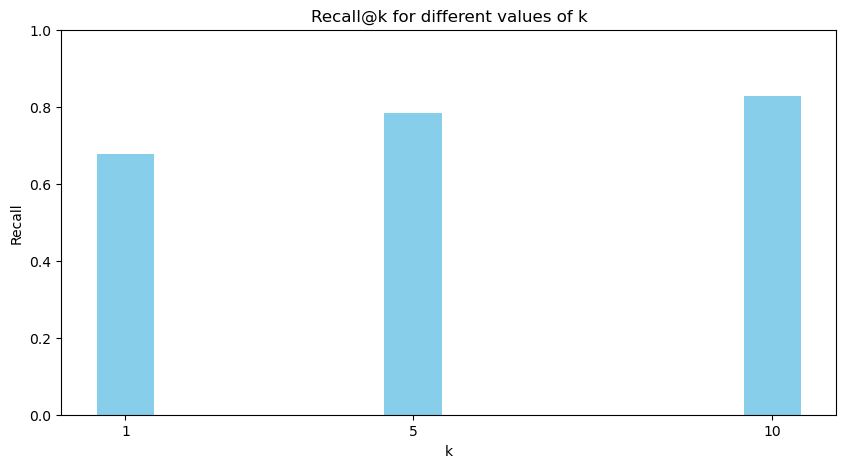

In [69]:
tokenized_corpus = [doc.split(" ") for doc in df["book_text"]]
bm25 = BM25Okapi(tokenized_corpus)

print("Starting recall@k calculation for k=1 to 10...")

# Initialize counters for each k
n_correct_at_k = {k: 0 for k in [1, 5, 10]}

# Precompute all BM25 scores
all_doc_scores = []

for row in tqdm.tqdm(filtered_df["depth_3_summary"], desc='Precomputing scores', unit='summary'):
    tokenized_query = row.split(" ")
    doc_scores = bm25.get_scores(tokenized_query)
    all_doc_scores.append(doc_scores)

# Calculate recall@k
for index, doc_scores in tqdm.tqdm(enumerate(all_doc_scores), total=len(filtered_df), desc='Recall@k', unit='row'):
    # Get top-10 indexes only once
    top_10_indexes = heapq.nlargest(10, range(len(doc_scores)), key=lambda i: doc_scores[i])
    print(top_10_indexes)
    
    # Check for k=1, 5, 10
    for k in [1, 5, 10]:
        if index in top_10_indexes[:k]:
            n_correct_at_k[k] += 1

# Calculate recall at each k
recall_at_k = {k: n_correct_at_k[k] / len(filtered_df) for k in [1, 5, 10]}
for k in [1, 5, 10]:
    print(f"Recall at k = {k}: {recall_at_k[k]:.4f}")

print("Calculation completed.")

# Visualization of the recall@k results
k_values = list(recall_at_k.keys())
recall_values = list(recall_at_k.values())

plt.figure(figsize=(10, 5))
plt.bar(k_values, recall_values, color='skyblue')
plt.xlabel('k')
plt.ylabel('Recall')
plt.title('Recall@k for different values of k')
plt.xticks(k_values)
plt.ylim(0, 1)
plt.show()

In [4]:
df = get_evaluation_set_6()
tokenized_corpus = [doc.split(" ") for doc in df[DOCUMENT]]
bm25 = BM25Okapi(tokenized_corpus)

print("Starting recall@k calculation 6B...")
# Initialize counters for each k
n_correct_at_k = {k: 0 for k in range(1, 11)}
total_rows = len(df)

# Initialize tqdm progress bar
pbar = tqdm.tqdm(total=total_rows, desc='Recall@k', unit='row')

for index, row in enumerate(df.itertuples()):
    tokenized_query = getattr(row, QUERY).split(" ")
    doc_scores = bm25.get_scores(tokenized_query)
    
    for k in range(1, 11):
        top_k_indexes = heapq.nlargest(k, range(len(doc_scores)), key=lambda i: doc_scores[i])
        if index in top_k_indexes:
            n_correct_at_k[k] += 1
    
    # Update progress bar
    pbar.update(1)

# Close the progress bar upon completion
pbar.close()

# Calculate and print recall at each k
recall_at_k = {k: n_correct_at_k[k] / total_rows for k in range(1, 11)}
for k in range(1, 11):
    print(f"Recall at k = {k}: {recall_at_k[k]:.4f}")

print("Calculation completed.")

Starting recall@k calculation 6B...


Recall@k: 100%|██████████| 4108/4108 [06:18<00:00, 10.85row/s]

Recall at k = 1: 0.9954
Recall at k = 2: 0.9959
Recall at k = 3: 0.9959
Recall at k = 4: 0.9961
Recall at k = 5: 0.9961
Recall at k = 6: 0.9961
Recall at k = 7: 0.9961
Recall at k = 8: 0.9961
Recall at k = 9: 0.9961
Recall at k = 10: 0.9963
Calculation completed.


In [5]:
df = get_evaluation_set_175()
tokenized_corpus = [doc.split(" ") for doc in df[DOCUMENT]]
bm25 = BM25Okapi(tokenized_corpus)

print("Starting recall@k calculation 175B...")

# Initialize counters for each k
n_correct_at_k = {k: 0 for k in range(1, 11)}
total_rows = len(df)

# Initialize tqdm progress bar
pbar = tqdm.tqdm(total=total_rows, desc='Recall@k', unit='row')

for index, row in enumerate(df.itertuples()):
    tokenized_query = getattr(row, QUERY).split(" ")
    doc_scores = bm25.get_scores(tokenized_query)
    
    for k in range(1, 11):
        top_k_indexes = heapq.nlargest(k, range(len(doc_scores)), key=lambda i: doc_scores[i])
        if index in top_k_indexes:
            n_correct_at_k[k] += 1
    
    # Update progress bar
    pbar.update(1)

# Close the progress bar upon completion
pbar.close()

# Calculate and print recall at each k
recall_at_k = {k: n_correct_at_k[k] / total_rows for k in range(1, 11)}
for k in range(1, 11):
    print(f"Recall at k = {k}: {recall_at_k[k]:.4f}")

print("Calculation completed.")

Starting recall@k calculation 175B...


Recall@k: 100%|██████████| 4108/4108 [05:05<00:00, 13.46row/s]

Recall at k = 1: 0.8225
Recall at k = 2: 0.8678
Recall at k = 3: 0.8841
Recall at k = 4: 0.8965
Recall at k = 5: 0.9043
Recall at k = 6: 0.9102
Recall at k = 7: 0.9153
Recall at k = 8: 0.9214
Recall at k = 9: 0.9245
Recall at k = 10: 0.9267
Calculation completed.


Retrieval vs. Ngram Score @10:  97%|█████████▋| 4000/4108 [04:42<00:07, 14.17row/s]


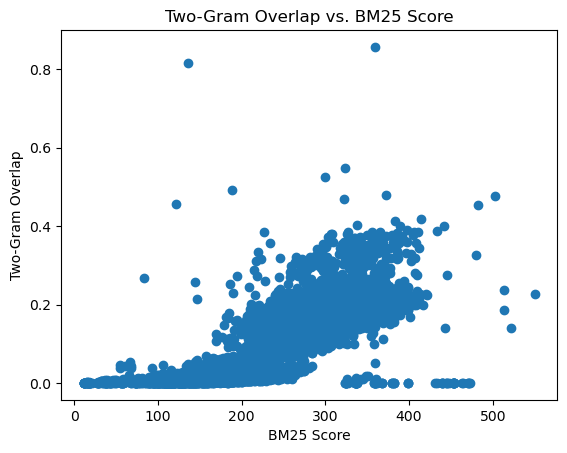

In [6]:
df = get_evaluation_set()
tokenized_corpus = [doc.split(" ") for doc in df[DOCUMENT]]
bm25 = BM25Okapi(tokenized_corpus)

# Simulated BM25 scores and two-gram overlap calculation
bm25_scores = []
two_gram_overlaps = []

for k in range(10, 11): 
    
    pbar = tqdm.tqdm(total=total_rows, desc=f'Retrieval vs. Ngram Score @{k}', unit='row')

    for index, row in df.iterrows():
        query, document = row[QUERY].split(" "), row[DOCUMENT]
        # Simulate BM25 scoring
        doc_scores = bm25.get_scores(query)  # Replace with actual BM25 scoring
        top_k_indexes = heapq.nlargest(k, range(len(doc_scores)), key=lambda i: doc_scores[i])
        
        # Calculate two-gram overlap for top-k documents
        for i in top_k_indexes:
            overlap = two_gram_overlap(row[QUERY], df[DOCUMENT][i])
            bm25_scores.append(doc_scores[i]) 
            two_gram_overlaps.append(overlap)
            
        # Update progress bar
        pbar.update(1)
    
    # Close the progress bar upon completion
    pbar.close()
            
    # Plotting
    plt.scatter(bm25_scores, two_gram_overlaps)
    plt.xlabel('BM25 Score')
    plt.ylabel('Two-Gram Overlap')
    plt.title('Two-Gram Overlap vs. BM25 Score')
    plt.show()